# Análisis Global

Para llevar a cabo un análisis más detallado y completo de los precios de la gasolina en Colombia durante el año 2023, se han unificado los datos correspondientes a los cuatro trimestres del año, que se encontraban almacenados en bases de datos independientes. Esta integración de los datos permite no solo examinar las variaciones dentro de cada trimestre, sino también entender mejor las tendencias anuales en los precios de la gasolina y las diferencias entre los distintos tipos de combustibles y tipos de gasolineras (banderas).

A través de la combinación de estos datos trimestrales, se busca identificar patrones temporales, cambios estacionales y posibles variaciones regionales a lo largo del año. Este análisis global proporcionará una visión más holística del comportamiento de los precios de la gasolina, facilitando el estudio de la evolución de los precios en diferentes periodos y permitiendo una comparación integral que apoye la toma de decisiones informadas para diferentes actores del mercado y la política pública.

In [24]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from IPython.display import display

trimestre1 = pd.read_csv("precios.csv")
trimestre2 = pd.read_csv("precios (1).csv")
trimestre3 = pd.read_csv("precios (2).csv")
trimestre4 = pd.read_csv("precios (3).csv")

trimestre1.columns = trimestre1.columns.str.replace(' ', '')
trimestre2.columns = trimestre2.columns.str.replace(' ', '')
trimestre3.columns = trimestre3.columns.str.replace(' ', '')
trimestre4.columns = trimestre4.columns.str.replace(' ', '')

gasolina2023 = pd.concat([
    trimestre1.assign(TRIMESTRE='Q1'),
    trimestre2.assign(TRIMESTRE='Q2'),
    trimestre3.assign(TRIMESTRE='Q3'),
    trimestre4.assign(TRIMESTRE='Q4')
], ignore_index=True)


display(gasolina2023.head())
display(gasolina2023.describe())


,BANDERA,NOMBRECOMERCIAL,PRODUCTO,FECHAREGISTRO,DEPARTAMENTO,MUNICIPIO,VALORPRECIO,TRIMESTRE
0,TERPEL,ESTACION DE SERVICIO SERVICENTRO LA PEDRERA,DIESEL,01-Jan-2023,AMAZONAS,LA PEDRERA,15000.0,Q1
1,TERPEL,ESTACION DE SERVICIO SERVICENTRO LA PEDRERA,GASOLINA MOTOR,01-Jan-2023,AMAZONAS,LA PEDRERA,15500.0,Q1
2,TERPEL,ESTACION DE SERVICIO DISTRIBUIDORA LOS COMUNEROS,GASOLINA MOTOR,01-Jan-2023,AMAZONAS,LETICIA,11380.0,Q1
3,TERPEL,ESTACION DE SERVICIO DISTRIBUIDORA LOS COMUNEROS,GASOLINA MOTOR,01-Jan-2023,AMAZONAS,LETICIA,11380.0,Q1
4,TERPEL,ESTACION DE SERVICIO DISTRIBUIDORA LOS COMUNEROS,DIESEL,01-Jan-2023,AMAZONAS,LETICIA,10671.0,Q1


,VALORPRECIO
count,2.680010e+05
mean,1.202214e+04
std,2.870676e+04
min,0.000000e+00
25%,9.350000e+03
50%,1.087000e+04
75%,1.384700e+04
max,1.475015e+07


# Análisis exploratorio

Con el conjunto de datos unificado de los cuatro trimestres del año 2023, se realiza un análisis exploratorio para entender mejor la distribución y los patrones de los precios de la gasolina en Colombia. Este análisis incluye visualizaciones que muestran la distribución de precios, la variación entre tipos de combustibles y gasolineras, así como comparaciones regionales y temporales que permiten identificar tendencias clave a lo largo del año.

A continuación, se presentan una serie de gráficos que permiten explorar estos aspectos con más detalle.

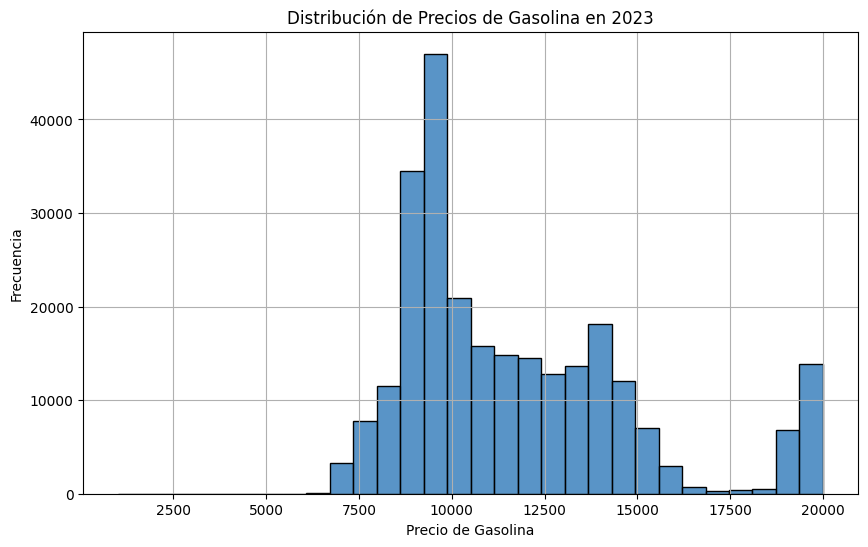

In [25]:
gasolina2023 = gasolina2023[(gasolina2023['VALORPRECIO'] > 1000) & (gasolina2023['VALORPRECIO'] < 20000)]

# Histograma de la distribución de precios de gasolina
plt.figure(figsize=(10, 6))
sns.histplot(gasolina2023['VALORPRECIO'], bins=30, color='#2171B5')
plt.title('Distribución de Precios de Gasolina en 2023')
plt.xlabel('Precio de Gasolina')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

El histograma de la distribución de precios de la gasolina en Colombia durante 2023 muestra una tendencia bimodal. La mayoría de los precios se concentran alrededor de los 10,000 COP, lo que indica que este rango es el más común para el precio de la gasolina en el país. Este pico pronunciado sugiere que la mayoría de las estaciones de servicio establecieron precios cercanos a este valor. Además, se observa un segundo grupo de precios notable alrededor de los 20,000 COP, aunque este es mucho menos frecuente que el primero. Esta segunda agrupación puede corresponder a estaciones en áreas remotas, con menos acceso, o a tipos de combustible de mayor calidad o premium, lo que refleja una diferencia en la oferta y la demanda regional o por producto.

Entre estos dos picos principales, los precios varían, con una disminución progresiva en la frecuencia a medida que los precios se alejan del rango más común. Esto indica una menor cantidad de estaciones de servicio con precios extremadamente bajos o altos, mostrando que la mayoría de los precios tienden a agruparse en torno al valor modal de 10,000 COP. Este patrón sugiere una relativa estabilidad en los precios de la gasolina en Colombia durante 2023, con algunas variaciones dependiendo de factores como la ubicación geográfica, la infraestructura de distribución o el tipo de combustible ofrecido.

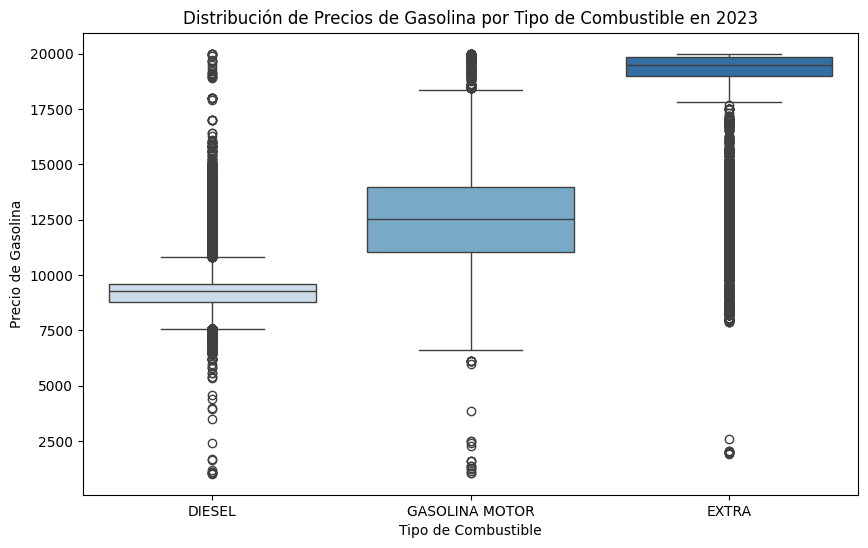

In [26]:
import warnings
warnings.filterwarnings('ignore') 

plt.figure(figsize=(10, 6))
sns.boxplot(x='PRODUCTO', y='VALORPRECIO', data=gasolina2023, palette='Blues')
plt.title('Distribución de Precios de Gasolina por Tipo de Combustible en 2023')
plt.xlabel('Tipo de Combustible')
plt.ylabel('Precio de Gasolina')
plt.show()

El boxplot muestra la distribución de precios de tres tipos de combustibles en Colombia durante 2023: DIESEL, GASOLINA MOTOR, y EXTRA. El **DIESEL** tiene los precios más bajos, concentrándose alrededor de los 10,000 COP, aunque presenta muchos valores atípicos, indicando variabilidad en algunas estaciones. La **GASOLINA MOTOR** es más cara, con precios que varían entre 10,000 y 15,000 COP, mostrando mayor dispersión y un rango intercuartílico amplio. La **EXTRA** es el combustible más caro, con precios consistentemente altos por encima de los 18,000 COP y menos variabilidad, lo que indica estabilidad de precios. Esto refleja que los precios del combustible varían significativamente según el tipo, con el EXTRA siendo el más costoso y el DIESEL el más económico pero más variable.

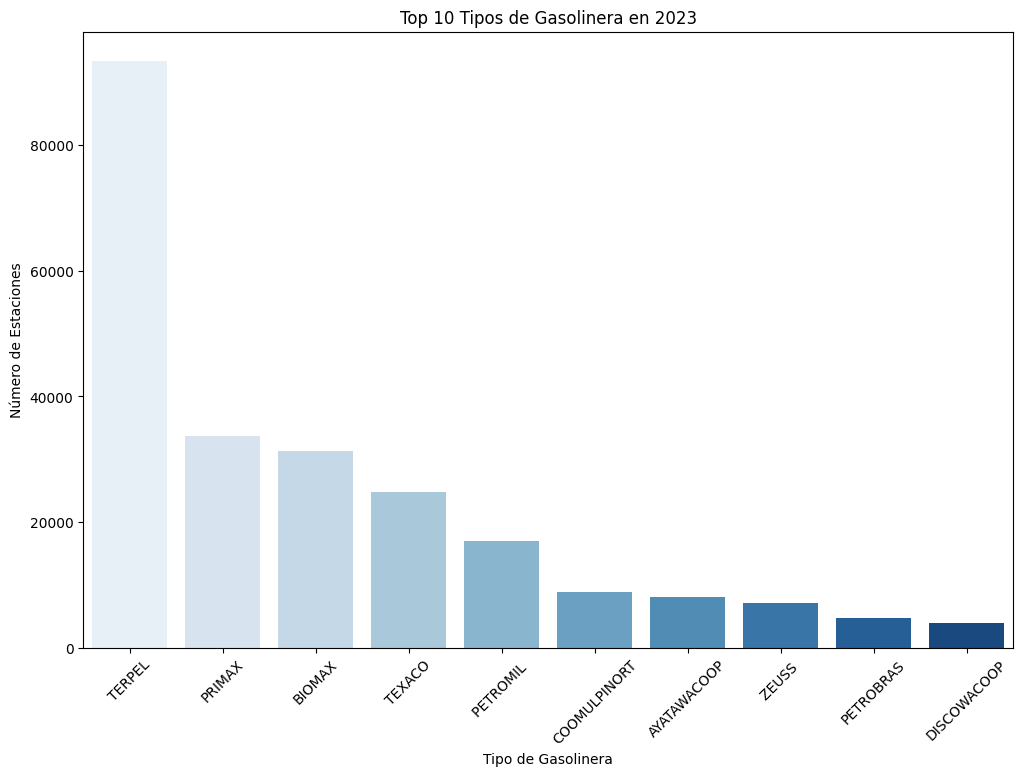

In [27]:
top_gasolineras = gasolina2023['BANDERA'].value_counts().nlargest(10)

# Gráfico de barras del número de estaciones por tipo de gasolinera
plt.figure(figsize=(12, 8))
sns.barplot(x=top_gasolineras.index, y=top_gasolineras.values, palette='Blues')
plt.title('Top 10 Tipos de Gasolinera en 2023')
plt.xlabel('Tipo de Gasolinera')
plt.ylabel('Número de Estaciones')
plt.xticks(rotation=45)
plt.show()


El gráfico de barras muestra los 10 tipos de gasolineras más comunes en Colombia en 2023 según el número de estaciones. **Terpel** es, con diferencia, la marca dominante, con más de 80,000 estaciones, superando ampliamente a las demás marcas. Le siguen **Primax** y **Biomax**, cada una con alrededor de 40,000 estaciones, mostrando una presencia significativa, aunque mucho menor que Terpel. **Texaco** también tiene una presencia considerable, con alrededor de 30,000 estaciones.

Las marcas restantes, como **Petromil**, **Coomulpinort**, **Aytawacoop**, **Zeuss**, **Petrobras**, y **Discowacoop**, tienen una presencia mucho menor, todas con menos de 20,000 estaciones. Esto indica que el mercado de estaciones de servicio en Colombia está altamente concentrado, con Terpel dominando claramente el sector y un pequeño número de marcas compitiendo en el resto del mercado.

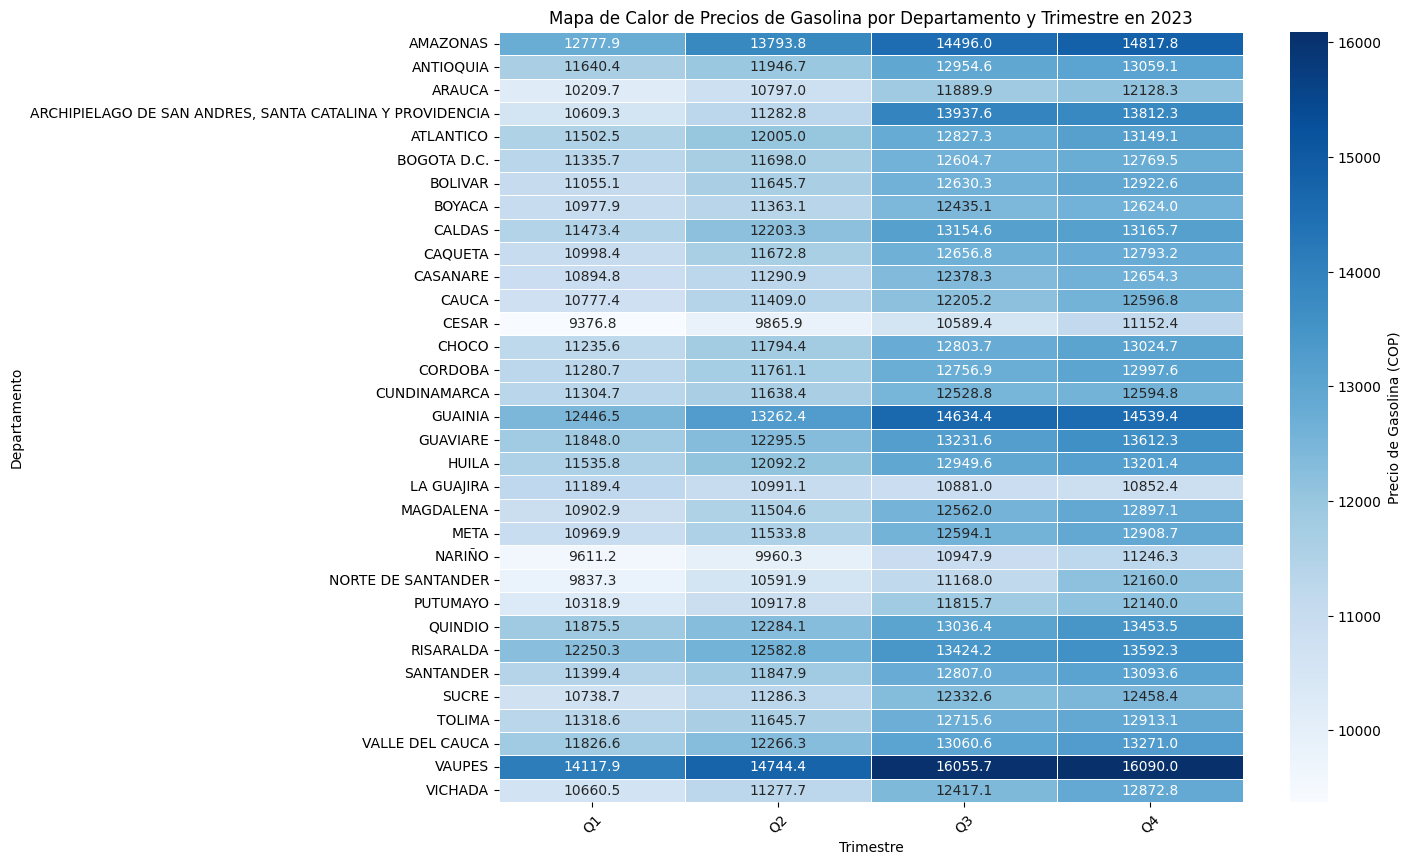

In [28]:
pivot_table = gasolina2023.pivot_table(
    index='DEPARTAMENTO',
    columns='TRIMESTRE',
    values='VALORPRECIO',
    aggfunc='mean'
)

# Ordenar la tabla para que los departamentos aparezcan en orden alfabético
pivot_table = pivot_table.sort_index()

plt.figure(figsize=(12, 10))
sns.heatmap(pivot_table, annot=True, fmt=".1f", cmap='Blues', linewidths=.5, cbar_kws={'label': 'Precio de Gasolina (COP)'})
plt.title('Mapa de Calor de Precios de Gasolina por Departamento y Trimestre en 2023')
plt.xlabel('Trimestre')
plt.ylabel('Departamento')
plt.xticks(rotation=45)
plt.show()

El mapa de calor muestra la variación de los precios de la gasolina por departamento y trimestre en Colombia durante 2023. En el gráfico, cada fila representa un departamento de Colombia y cada columna un trimestre del año, mientras que la intensidad del color refleja el precio promedio de la gasolina en COP.

Los departamentos con los precios de gasolina más altos, como **Vaupés** y **Archipiélago de San Andrés, Providencia y Santa Catalina**, se destacan por los tonos más oscuros en todos los trimestres, con precios que superan consistentemente los 16,000 COP e incluso alcanzan casi 19,500 COP en algunos casos. Esto indica una tendencia persistente de altos precios en estas áreas, probablemente debido a factores como la dificultad de acceso o costos logísticos más elevados.

Por otro lado, departamentos como **Nariño** y **Norte de Santander** muestran precios significativamente más bajos, con valores en torno a los 10,000 COP o menos durante todo el año. Este patrón sugiere que estos departamentos tienen mejor acceso a la gasolina o costos de distribución más bajos.

Un pico notable se observa en **Bolívar** durante el tercer trimestre, con un precio de 21,585.3 COP, que es considerablemente más alto que en cualquier otro trimestre o departamento. Esto podría indicar un evento puntual que afectó los precios en esa región durante ese periodo.

En general, el mapa de calor resalta las disparidades regionales en los precios de la gasolina en Colombia a lo largo de 2023, evidenciando que factores locales, como la accesibilidad, la infraestructura, y posibles fluctuaciones del mercado, influyen significativamente en los costos del combustible en cada departamento.

In [29]:
colombia_shape = gpd.read_file("C:/Users/sofmo/Documents/COLOMBIA/COLOMBIA.shp")

colombia_shape['DPTO_CNMBR'] = colombia_shape['DPTO_CNMBR'].replace({'NARI?O': 'NARIÑO'})

precios_promedio = gasolina2023.groupby('DEPARTAMENTO')['VALORPRECIO'].mean().reset_index()

mapa_col = colombia_shape.merge(precios_promedio, how='left', left_on='DPTO_CNMBR', right_on='DEPARTAMENTO')

m = folium.Map(location=[4.5709, -74.2973], zoom_start=5, tiles='cartodbpositron')  # Centrado en Colombia

folium.Choropleth(
    geo_data=mapa_col,
    data=mapa_col,
    columns=['DPTO_CNMBR', 'VALORPRECIO'],
    key_on='feature.properties.DPTO_CNMBR',
    fill_color='YlGnBu',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Precio Promedio de Gasolina (COP)'
).add_to(m)

m.save("mapa_colombia.html")

m


KeyboardInterrupt: 

# Conclusión

La visualización de los datos sobre los precios de la gasolina en Colombia durante 2023 revela importantes patrones geográficos y temporales que reflejan la dinámica del mercado de combustibles en el país. En primer lugar, se observa una marcada variación en los precios según el tipo de combustible; el **DIESEL** es generalmente el más económico con precios más estables, mientras que la **GASOLINA EXTRA** es la más costosa, mostrando menor dispersión en su rango de precios.

A nivel regional, los datos indican que ciertos departamentos, como **Vaupés** y el **Archipiélago de San Andrés**, presentan consistentemente los precios más altos a lo largo del año, probablemente debido a factores como la dificultad de acceso y costos logísticos. En contraste, departamentos como **Nariño** y **Norte de Santander** tienen precios más bajos, reflejando mejor accesibilidad o costos de distribución más favorables.

La clara predominancia de ciertas marcas de estaciones de servicio, como Terpel, destaca una alta concentración en el mercado de distribución de gasolina, lo que podría influir en la fijación de precios y en la disponibilidad de ciertos tipos de combustible en distintas regiones.

En general, el análisis evidencia cómo la geografía, la infraestructura, el tipo de combustible, y la competencia en el mercado juegan un papel crucial en la determinación de los precios de la gasolina en Colombia. Estas variaciones son importantes tanto para los consumidores como para los formuladores de políticas públicas, quienes pueden considerar estos factores para desarrollar estrategias que fomenten una mayor equidad en los precios del combustible en todo el país.